In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pylab 
from mpl_toolkits.mplot3d import Axes3D

In [178]:
a = 6.
b = -1.
N = 100
sig = .4 # écar
mu = 0

In [179]:
def donnesDeJeuts(N, sig, mu, a, b):
    X = np.random.rand(N)
    Eps = mu + np.random.randn(N) * sig
    return X, a*X + b + Eps
#
X,Y = donnesDeJeuts(N,sig,mu,a,b)


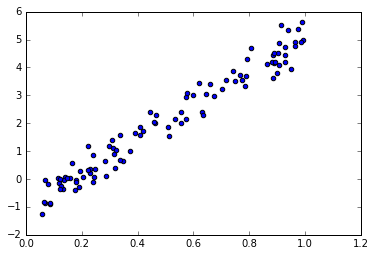

In [180]:
plt.scatter(X,Y)
plt.show()

In [181]:
def estimationAB(X,Y):
    covXY= np.cov([X,Y]) #Retourne un tableau 2*2, covXY[0][0]=cov(X), covXY[1][1]=cov(Y), covXY[0][1]=covXY[1][0]=cov(X,Y)
    Ex = np.mean(X)
    Ey = np.mean(Y)
    Vx = np.var(X)
    
    a = covXY[0][1] / Vx
    b = Ey - (covXY[0][1]/Vx)*Ex
    
    return a,b
a,b=estimationAB(X,Y)
print(a,b)

6.17368594993 -1.03844498735


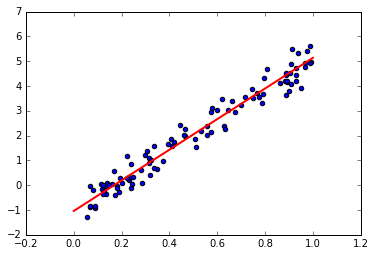

In [182]:
#dessiner la droite  Y = aX + b

plt.plot([a* x + b for x in range(2)], 'r-', lw=2)
plt.scatter(X,Y)
plt.show()

[ 6.11194909 -1.00755448]


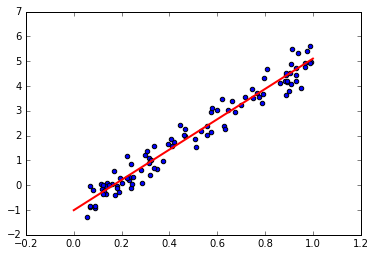

In [183]:

def estimationMoindresCarres(X, Y):
    Xc = np.hstack((X.reshape(N,1),np.ones((N,1))))
    Xc += 0
    return np.linalg.solve(Xc.transpose().dot(Xc), Xc.transpose().dot(Y))
#teste
h = estimationMoindresCarres(X, Y) #wstar 
plt.plot([h[0] * x + h[1] for x in range(2)], 'r-', lw=2)
plt.scatter(X,Y)
print(h)
plt.show()

In [184]:
def descenteGradient(X, ylin,eps,nIterations):
    
    nIterations = 30
    w = np.zeros(X.shape[1]) #init a 0
    allw = [w]
    for i in range(nIterations):
        w = w - eps * 2* X.transpose().dot(X.dot(w) - ylin)
        allw.append(w)
    return w, np.array(allw)

In [185]:
def afficheDescGradient(X, ylin, allD, D_star):
    ngrid = 20
    d1range = np.linspace(-0.5, 8, ngrid)
    d2range = np.linspace(-1.5, 1.5, ngrid)
    d1, d2 = np.meshgrid(d1range, d2range)
    cost = np.array([[np.log(((X.dot(np.array([d1i,d2j]))-ylin)**2).sum()) for d1i in d1range] for d2j in d2range])
    fig = plt.figure()
    plt.contour(d1, d2, cost)
    plt.scatter(D_star[0], D_star[1], c='r')
    plt.plot(allD[:,0], allD[:,1],'b+-', lw=2 )
    plt.show()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(d1, d2, cost, rstride = 1, cstride=1 )   
    plt.show()

/usr/local/lib/python3.4/dist-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.4/dist-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


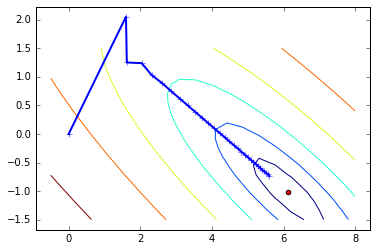

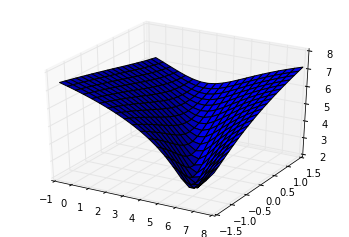

In [186]:
#Approche Descente Gradient, avec une valeur de epsilon qui se rapproche bien de l'optimum globale avec 30 its 

T = np.array([0,1])
Xc = np.hstack((X.reshape(N,1),np.ones((N,1))))
eps = 5e-3
nIterations =30
D_est, allD = descenteGradient(Xc, Y,eps,nIterations)
#print(D_est,allD)
#Affichage descente gradient
afficheDescGradient(Xc, Y, allD, h)

/usr/local/lib/python3.4/dist-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.4/dist-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


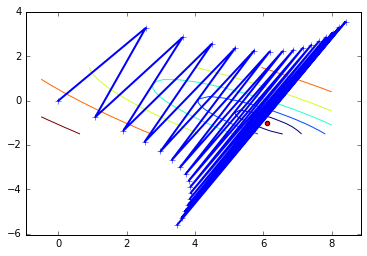

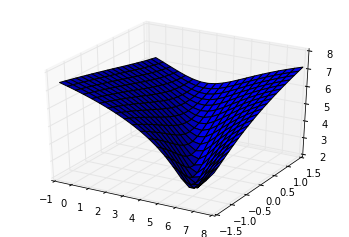

In [187]:
#Approche Descente Gradient, avec une grande valeur de epsilon 
#on remarque que le gradient oscille beaucoup 
# mais ne converge pas j'ai essayé differentes valeurs pour nIterations de 10 a 90
T = np.array([0,1])
Xc = np.hstack((X.reshape(N,1),np.ones((N,1))))
eps = 8e-3
nIterations = 90
D_est, allD = descenteGradient(Xc, Y,eps,nIterations)
#print(D_est,allD)
#Affichage descente gradient
afficheDescGradient(Xc, Y, allD, h)

/usr/local/lib/python3.4/dist-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.4/dist-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


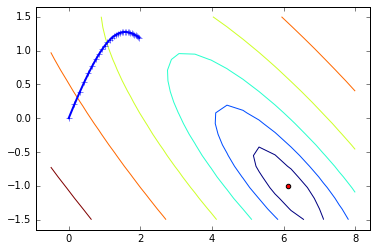

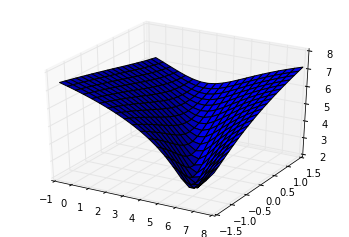

In [188]:
#Approche Descente Gradient, avec une petite valeur de epsilon 
#le gradient se rapproche tres tres lentement de l optimum globale 

T = np.array([0,1])
Xc = np.hstack((X.reshape(N,1),np.ones((N,1))))
eps = 0.5e-3
nIterations=100
D_est, allD = descenteGradient(Xc, Y,eps,nIterations)
#print(D_est,allD)
#Affichage descente gradient
afficheDescGradient(Xc, Y, allD, h)

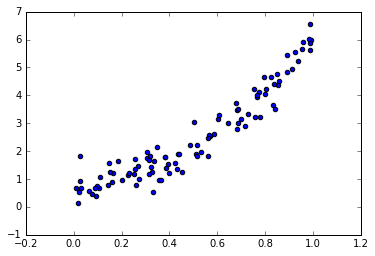

In [189]:
def donnesDeJouetsQuad(N,sig,mu, a, b, c):
    X = np.random.rand(N)
    Eps = mu + np.random.randn(N) * sig
    return X, a * (X**2) + b * X + c + Eps

c=1
Xq,Yq = donnesDeJouetsQuad(N,sig,mu,a,b,c)
plt.scatter(Xq,Yq)
plt.show()

In [190]:
def estimation(Xe, Y):
    return np.linalg.solve(Xe.transpose().dot(Xe), Xe.transpose().dot(Y))

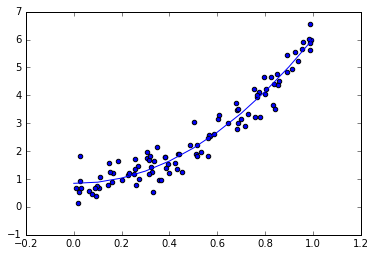

In [191]:
Xe = np.hstack( ((Xq**2).reshape(N,1), Xq.reshape(N,1), np.ones((N,1))) )
Dquad = estimation(Xe, Yq)
T = np.arange(0,1.1,.1)
plt.figure()
plt.scatter(Xq, Yq)
plt.plot(T, Dquad[0]*(T**2) + Dquad[1]*T + Dquad[2], 'b')
plt.show()

In [192]:
data = np.loadtxt("winequality-red.csv", delimiter=";", skiprows=1)
N,d = data.shape # extraction des dimensions
pcTrain  = 0.7 # 70% des données en apprentissage
allindex = np.random.permutation(N)
indTrain = allindex[:int(pcTrain*N)]
indTest = allindex[int(pcTrain*N):]
X = data[indTrain,:-1] # pas la dernière colonne (= note à prédire)
Y = data[indTrain,-1]  # dernière colonne (= note à prédire)
# Echantillon de test (pour la validation des résultats)
XT = data[indTest,:-1] # pas la dernière colonne (= note à prédire)
YT = data[indTest,-1]  # dernière colonne (= note à prédire)

In [198]:
print(N,d)

1599 12
